## Load data.

In [1]:
import numpy as np
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

from helper_functions import pval_star

CWD = os.path.abspath("")  # Jupyter notebook path.
dir_output = os.path.join(CWD, "output")  # Folder to put figures in.
dir_npy = os.path.join(CWD, "npy")  # Data files needed for plotting figures.

# Set up plotting parameters.
sent_colors = ["#504DB2", "#414042", "#B2504D"]  # POS, NEU, NEG
# costra_colors = ["#2CBEC6", "#F59448"]  # collaborators, non-collaborators
# misc_colors = ["#E6B32F", "#3F6F88"]
font_kw = {"family": "arial", "weight": "normal", "size": "7"}  # Markers and such.
mpl.rc("font", **font_kw)

# Load data to plot.
sent2lab = {1: "Favorable Sentiment", 0: "Neutral Sentiment", -1: "Critical Sentiment"}
sent2idx = {1: 0, 0: 1, -1: 2}

ratio_mat_rel_will_collab = np.load(os.path.join(dir_npy, "ratio_mat_rel-t_collab_will_collab.npy"))
ratio_mat_rel_no_collab = np.load(os.path.join(dir_npy, "ratio_mat_rel-t_collab_no_collab.npy"))

## Make figures.

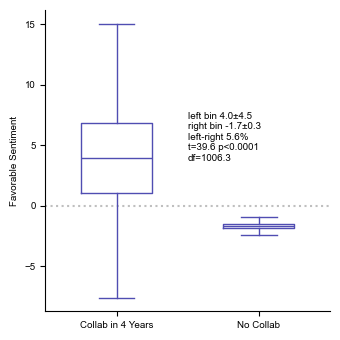

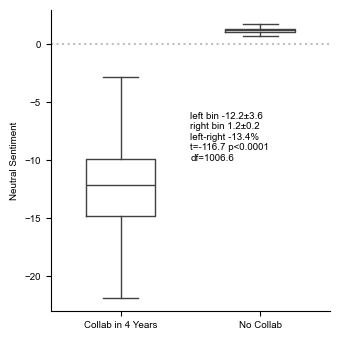

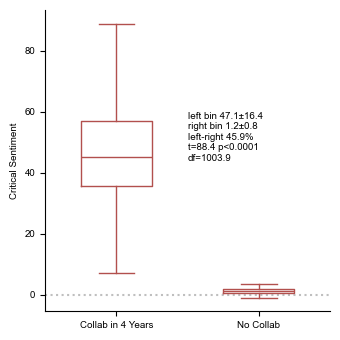

In [2]:
for i, s in enumerate([1, 0, -1]):
    fig, ax = plt.subplots(figsize=(3.41, 3.41))
    xticklabels = ["Collab in 4 Years", "No Collab"]
    x_arr = np.arange(len(xticklabels))
    kwargs = dict(
        widths=0.5,
        boxprops={"color": sent_colors[i]},
        medianprops={"color": sent_colors[i]},
        whiskerprops={"color": sent_colors[i], "visible": True},
        capprops={"color": sent_colors[i]},
    )
    kwargs.update(dict(showmeans=False, showfliers=False, showbox=True, showcaps=True))
    ax.boxplot([ratio_mat_rel_will_collab[i, :], ratio_mat_rel_no_collab[i, :]], **kwargs)
    abc1 = np.mean(ratio_mat_rel_will_collab[i, :])
    abc2 = np.std(ratio_mat_rel_will_collab[i, :])
    abc3 = np.mean(ratio_mat_rel_no_collab[i, :])
    abc4 = np.std(ratio_mat_rel_no_collab[i, :])
    res = stats.ttest_ind(ratio_mat_rel_will_collab[i, :], ratio_mat_rel_no_collab[i, :], equal_var=False, alternative="two-sided")
    styles_txt = dict(fontsize=7, fontweight="normal", horizontalalignment="left", transform=ax.transAxes)
    txt_box0 = f"left bin {abc1:.1f}±{abc2:.1f}\nright bin {abc3:.1f}±{abc4:.1f}\nleft-right {(abc1-abc3):.1f}%"
    txt_box0 += f"\nt={res.statistic:.1f} {pval_star(res.pvalue)}\ndf={res.df:.1f}"
    ax.text(0.50, 0.50, txt_box0, color="black", **styles_txt)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    ax.set_xticks(range(1, len(xticklabels) + 1), xticklabels, rotation=0)
    ax.plot(xlim, [0, 0], color="grey", alpha=0.5, zorder=1, linestyle=":")  # Baseline (indistinguishable from null).¸
    ax.set_ylabel(sent2lab[s])
    ax.spines[["right", "top"]].set_visible(False)

    # ax.set_xlim(xlim)
    # ax.set_ylim(ylim)

    fig.tight_layout()
    plt.show()
    fig.savefig(os.path.join(dir_output, f"SUPP Collab or Not Collab {sent2lab[s]}.svg"), bbox_inches="tight", transparent=True)
    fig.clf()  # Clear figure.
    plt.close(fig=fig)  # Close figure.